In [49]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data
df = pd.read_csv('FINAL PROJECT.csv')

In [50]:
# PART 2: DATA CLEANING & PREPROCESSING

# Ensure all column names are clean
df.columns = df.columns.str.strip().str.lower()

# Filter only data for the year 2021
df_2021 = df[df['year'] == 2021].copy()

# Check and confirm there are no missing values
assert df_2021.isnull().sum().sum() == 0, "There are missing values that need attention."

# Drop unnecessary columns for modeling if needed
df_2021 = df_2021[['measure', 'location', 'sex', 'age', 'cause', 'metric', 'val']]


In [51]:
# Show the number of rows and columns
print("Shape of 2021 data:", df_2021.shape)

# Show the column names
print("Columns:", df_2021.columns.tolist())

# Display the first few rows
df_2021.head(250)  # Show the first 20 rows



Shape of 2021 data: (1728, 7)
Columns: ['measure', 'location', 'sex', 'age', 'cause', 'metric', 'val']


,measure,location,sex,age,cause,metric,val
36,Deaths,Republic of Rwanda,Male,10 - 54 years,Other infectious diseases,Number,357.011761
37,Deaths,Republic of Rwanda,Female,10 - 54 years,Other infectious diseases,Number,243.007558
38,Deaths,Republic of Rwanda,Male,10 - 54 years,Other infectious diseases,Percent,0.023496
39,Deaths,Republic of Rwanda,Female,10 - 54 years,Other infectious diseases,Percent,0.021025
40,Deaths,Republic of Rwanda,Male,10 - 54 years,Other infectious diseases,Rate,8.323896
...,...,...,...,...,...,...,...
1073,Deaths,Republic of Burundi,Female,55+ years,Non-communicable diseases,Rate,2309.699600
1146,Deaths,Republic of Uganda,Male,<5 years,Other infectious diseases,Number,2704.302360
1147,Deaths,Republic of Uganda,Female,<5 years,Other infectious diseases,Number,1996.131428
1148,Deaths,Republic of Uganda,Male,<5 years,Other infectious diseases,Percent,0.049032


In [53]:
# Remove rows where val is 0
df_2021 = df_2021[df_2021['val'] != 0]


In [8]:
# Top 5 causes of death by number
top_causes = (
    df_2021[df_2021['metric'] == 'Number']
    .groupby('cause')['val']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
top_causes


cause
Communicable, maternal, neonatal, and nutritional diseases    4.772278e+07
Non-communicable diseases                                     2.730798e+07
Neglected tropical diseases and malaria                       7.973004e+06
Other infectious diseases                                     2.344784e+06
Nutritional deficiencies                                      1.880506e+06
Name: val, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_11648\1144436889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.values, y=top_causes.index, palette='Reds_d')


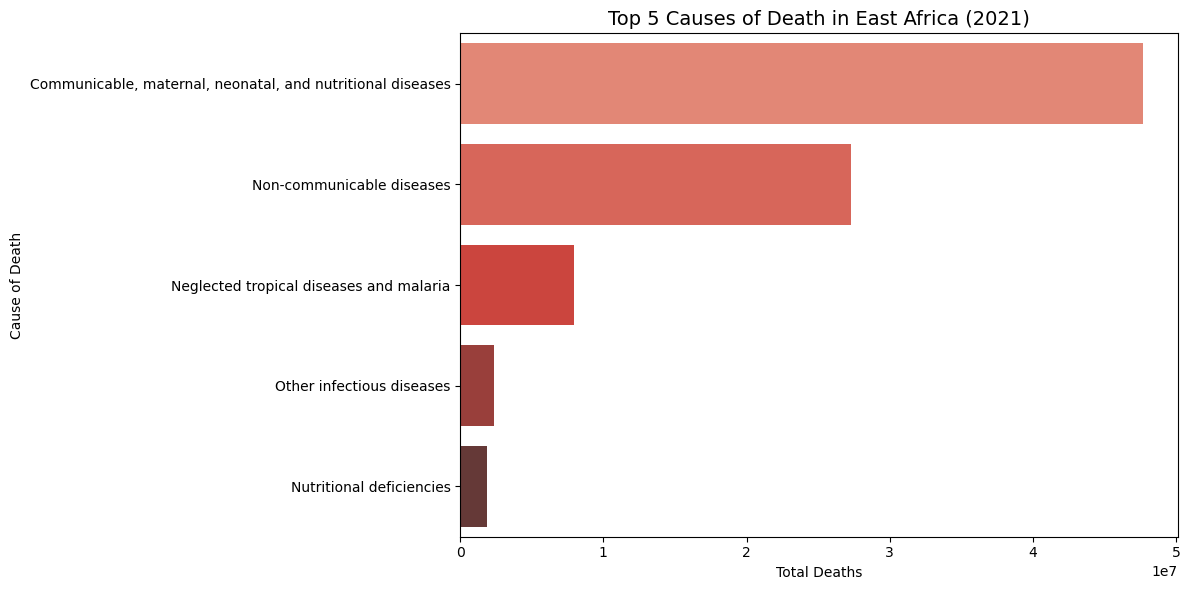

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_causes.values, y=top_causes.index, palette='Reds_d')
plt.title('Top 5 Causes of Death in East Africa (2021)', fontsize=14)
plt.xlabel('Total Deaths')
plt.ylabel('Cause of Death')
plt.tight_layout()
plt.show()

In [11]:
# Average death rate per country
country_rates = (
    df_2021[df_2021['metric'] == 'Rate']
    .groupby('location')['val']
    .mean()
    .sort_values(ascending=False)
)
country_rates

location
Republic of South Sudan        10747.935478
Republic of Uganda              7013.675433
Republic of Burundi             6926.378259
United Republic of Tanzania     5677.497462
Republic of Kenya               4907.880831
Republic of Rwanda              4867.550887
Name: val, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_11648\105303945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_rates.values, y=country_rates.index, palette='Blues_d')


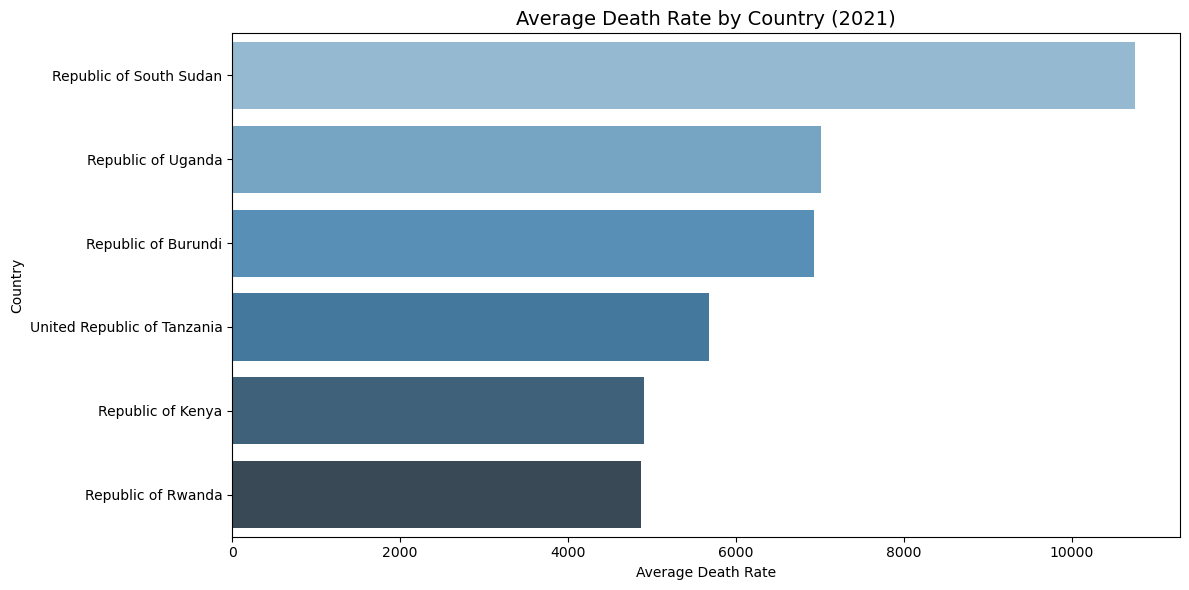

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x=country_rates.values, y=country_rates.index, palette='Blues_d')
plt.title('Average Death Rate by Country (2021)', fontsize=14)
plt.xlabel('Average Death Rate')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [14]:
 #Deaths by sex
sex_deaths = (
    df_2021[df_2021['metric'] == 'Number']
    .groupby('sex')['val']
    .sum()
)
sex_deaths

sex
Female    4.242193e+07
Male      4.626315e+07
Name: val, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_11648\502346714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_deaths.index, y=sex_deaths.values, palette='Set2')


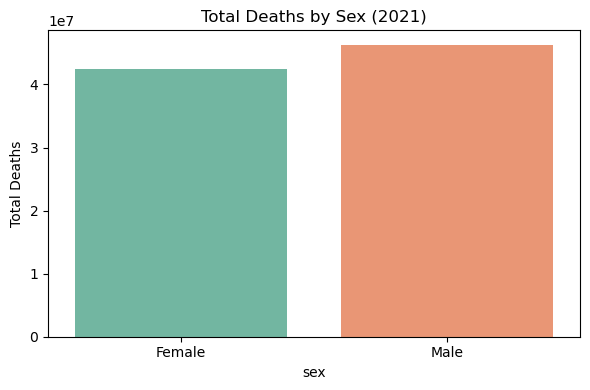

In [15]:
plt.figure(figsize=(6, 4))
sns.barplot(x=sex_deaths.index, y=sex_deaths.values, palette='Set2')
plt.title('Total Deaths by Sex (2021)')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()

In [16]:
# Deaths by age group
age_deaths = (
    df_2021[df_2021['metric'] == 'Number']
    .groupby('age')['val']
    .sum()
    .sort_values()
)
age_deaths

age
55+ years        1.562700e+07
10 - 54 years    3.293644e+07
<5 years         4.012164e+07
Name: val, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_11648\440493802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_deaths.values, y=age_deaths.index, palette='Purples_d')


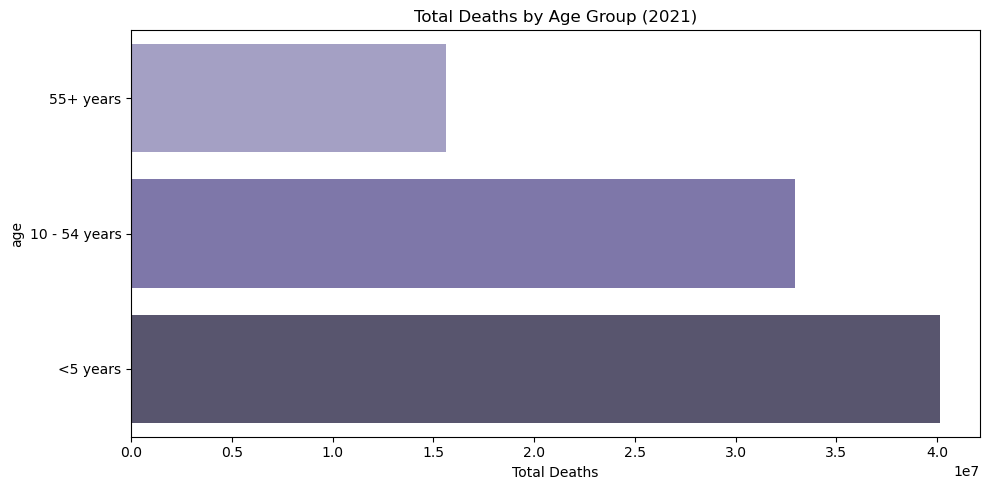

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=age_deaths.values, y=age_deaths.index, palette='Purples_d')
plt.title('Total Deaths by Age Group (2021)')
plt.xlabel('Total Deaths')
plt.tight_layout()
plt.show()

In [22]:
# MACHINE LEARNING - CLUSTERING


# Pivot table for clustering: Country vs Cause death rates
df_cluster = df_2021[df_2021['metric'] == 'Rate']
pivot = df_cluster.pivot_table(index='location', columns='cause', values='val', fill_value=0)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(pivot)

# Fit KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Assign clusters back to country
pivot['Cluster'] = clusters

# Evaluate clustering
score = silhouette_score(X, clusters)
print(f"\n✅ Silhouette Score: {round(score, 2)} (higher is better, max=1)\n")


✅ Silhouette Score: 0.18 (higher is better, max=1)



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\HP\AppData\Local\Temp\ipykernel_11648\2492222704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pivot['Cluster'], palette='Accent')


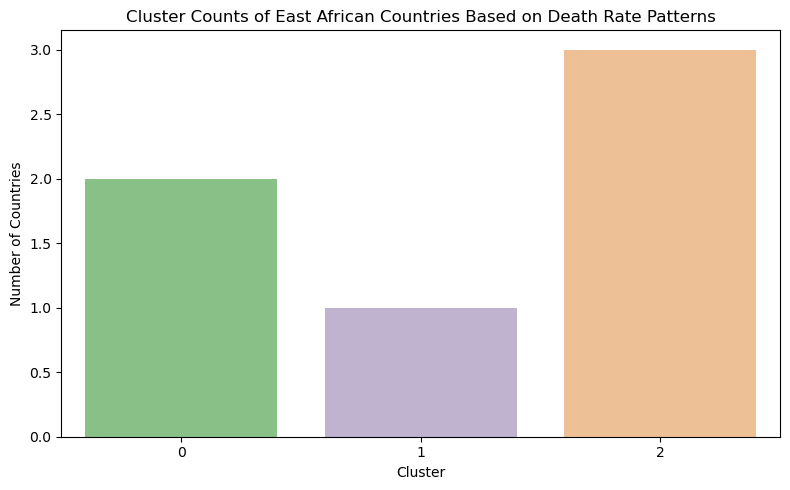

🌍 Country Cluster Assignments:

location
Republic of Kenya              0
Republic of Rwanda             0
Republic of South Sudan        1
Republic of Burundi            2
Republic of Uganda             2
United Republic of Tanzania    2
Name: Cluster, dtype: int32


In [25]:
 #Plot country clusters
plt.figure(figsize=(8, 5))
sns.countplot(x=pivot['Cluster'], palette='Accent')
plt.title('Cluster Counts of East African Countries Based on Death Rate Patterns')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

# Show cluster assignments
print("🌍 Country Cluster Assignments:\n")
print(pivot['Cluster'].sort_values())

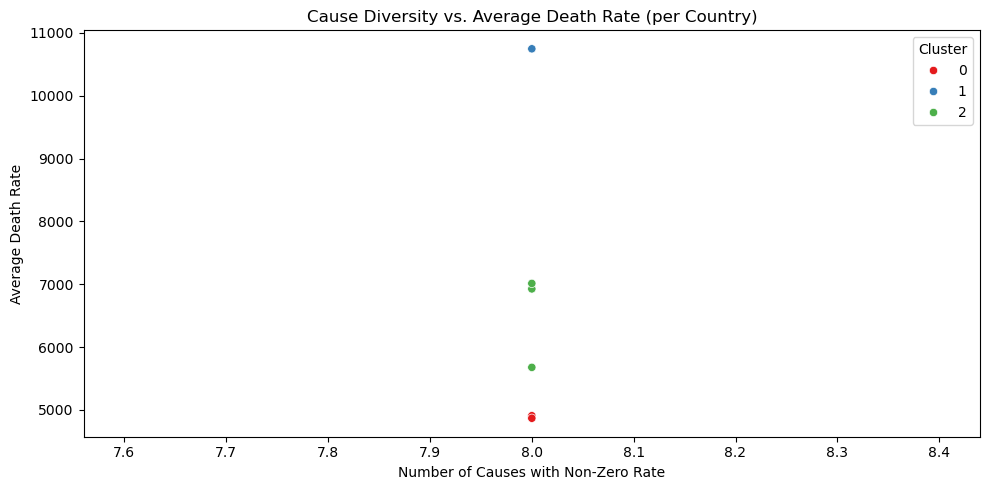

In [31]:
# Calculate cause diversity (number of non-zero causes per country)
pivot['Cause Diversity'] = (pivot.drop('Cluster', axis=1) > 0).sum(axis=1)

# Add average death rate per country
pivot['Average Rate'] = pivot.drop(columns=['Cluster', 'Cause Diversity']).mean(axis=1)

# Plot using seaborn with explicit data frame
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=pivot,
    x='Cause Diversity',
    y='Average Rate',
    hue='Cluster',
    palette='Set1'
)
plt.title('Cause Diversity vs. Average Death Rate (per Country)')
plt.xlabel('Number of Causes with Non-Zero Rate')
plt.ylabel('Average Death Rate')
plt.tight_layout()
plt.show()


In [38]:
# Export cleaned data for Power BI
df_2021.to_csv('Deaths_East_Africa_2021_CLEAN.csv', index=False)

print("✅ Exported: Deaths_East_Africa_2021_CLEAN.csv")


✅ Exported: Deaths_East_Africa_2021_CLEAN.csv


In [39]:
# Save country-level cluster info for Power BI
pivot_export = pivot.reset_index()[['location', 'Cluster', 'Cause Diversity', 'Average Rate']]
pivot_export.to_csv('Country_Clusters_2021.csv', index=False)

print("✅ Exported: Country_Clusters_2021.csv")


✅ Exported: Country_Clusters_2021.csv


In [41]:
df_2021.to_csv('Deaths_East_Africa_2021_CLEAN.csv', index=False)


In [54]:
df_2021.to_csv(r'C:\Users\HP\Documents\Deaths_East_Africa_2021_CLEAN.csv', index=False)


In [55]:
pivot_export.to_csv(r'C:\Users\HP\Documents\Country_Clusters_2021.csv', index=False)


In [1]:
import os
os.getcwd()


'C:\\Users\\HP'